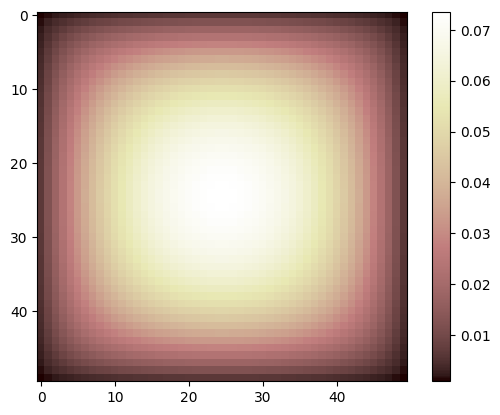

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
h = 1 / (N + 1)
u = np.zeros(N * N)
A = np.zeros((N * N, N * N))
b = np.zeros(N * N)
x = np.linspace(0, 1, N + 2)
y = np.linspace(0, 1, N + 2)

leftBND = 0
rightBND = 0
topBND = 0
bottomBND = 0

def f(x, y):
    return 1

for n in range(N * N):
    j = int(n / N) + 1
    i = (n + 1) - (j - 1) * N
    b[n] = h * h * f(x[i], y[j])

    a = np.zeros(N * N)
    a[n] = 4
    if i > 1:
        a[n - 1] = -1
    else:
        b[n] = b[n] + leftBND

    if i < N:
        a[n + 1] = -1
    else:
        b[n] = b[n] + rightBND

    if j > 1:
        a[n - N] = -1
    else:
        b[n] = b[n] + bottomBND

    if j < N:
        a[n + N] = -1
    else:
        b[n] = b[n] + topBND

    A[n, :] = a.copy()

u_ = np.linalg.solve(A, b)
u = u_.reshape((N, N))

plt.imshow(u, cmap='pink', interpolation='nearest')
plt.colorbar()
plt.show()

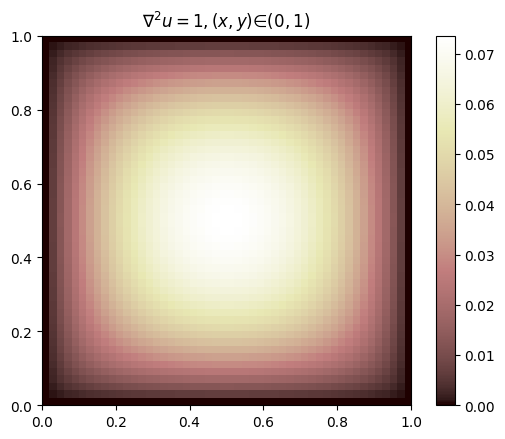

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
h = 1 / (N - 1)
u = np.zeros(N * N)
A = np.zeros((N * N, N * N))
b = np.zeros(N * N)
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)


def f(x, y):
    return 1

for n in range(N * N):
    j = n // N
    i = n % N

    if i == 0 or i == N-1 or j == 0 or j == N-1:
        # boundaries (Dirichlet)
        A[n, n] = 1
        b[n] = 0
    else:
        b[n] = h * h * f(x[i], y[j])

        A[n, n] = 4
        A[n, n - 1] = -1  # left
        A[n, n + 1] = -1  # right
        A[n, n - N] = -1  # bottom
        A[n, n + N] = -1  # top

u_ = np.linalg.solve(A, b)
u = u_.reshape((N, N))

plt.imshow(u, extent=[0, 1, 0, 1], cmap='pink', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title(r"$\nabla^2 u = 1, (x,y) ∈ (0,1)$")
plt.show()